In [1]:
# Installing needed libraries
! pip3 install networkx matplotlib
! pip3 install python-louvain


In [ ]:
# Importing the downloaded dataset
import pandas as pd

file_path = "/Users/Desktop/Spring 2024/job_listings1.xlsx"
df = pd.read_excel(file_path)
print(df)


                                         Title                     Company  \
0          Software Developer - Junior(REMOTE)               SynergisticIT   
1             Software Engineer - Early Career             Lockheed Martin   
2                   Software Engineer (Remote)              The Home Depot   
3            Junior Software Developer Trainee           Team Remotely Inc   
4               Entry-Level Software Developer                 Aptonet Inc   
..                                         ...                         ...   
370                          Software Engineer         Iron Galaxy Studios   
371                   Software Engineer Intern       SRS Distribution Inc.   
372                    Junior Python Developer              HireMeFast LLC   
373  Intern, Software Engineering (Full-stack)  i360 Solutions Ltd (Malta)   
374               Software Engineer – Robotics              Kodama Systems   

                      Location  \
0             Philadelphia, P

In [5]:
import networkx as nx

G = nx.Graph()
for index, row in df.iterrows():
    company_node = f"Company: {row['Company']}"
    location_node = f"Location: {row['Location']}"

    # Add nodes
    G.add_node(company_node, type='company')
    G.add_node(location_node, type='location')

    # Add edge
    G.add_edge(company_node, location_node)


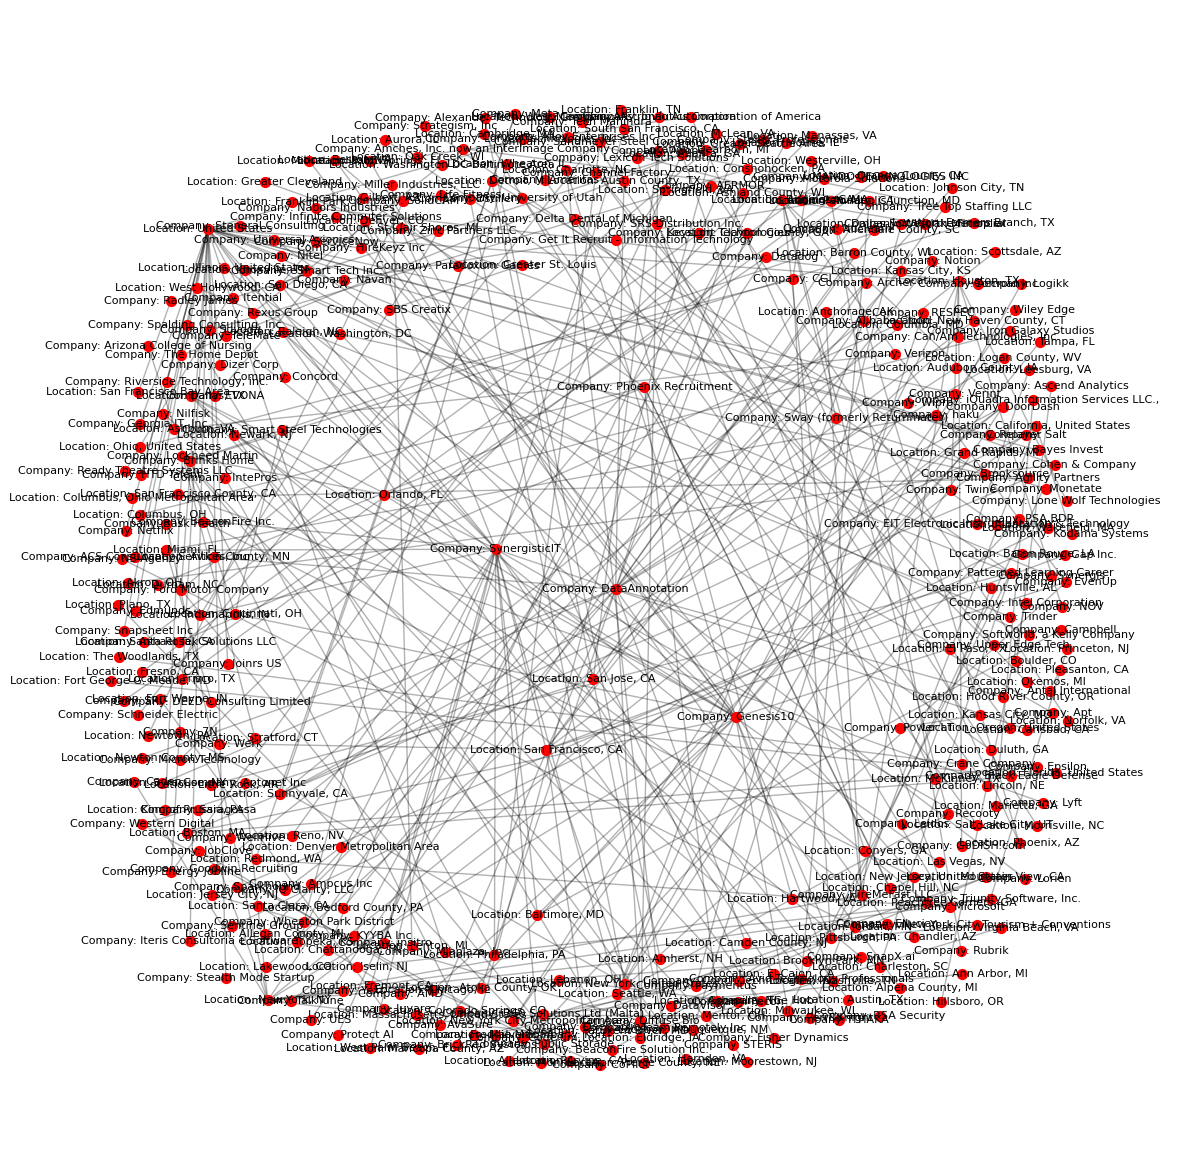

In [8]:
# Affiliation network - a bipartite visualization of the data collected using NetworkX
import matplotlib.pyplot as plt
import networkx as nx


plt.figure(figsize=(15, 15))  
pos = nx.spring_layout(G, k=0.800, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='red')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.axis('off') 
plt.savefig('network_graph.png', dpi=300)  
plt.show()


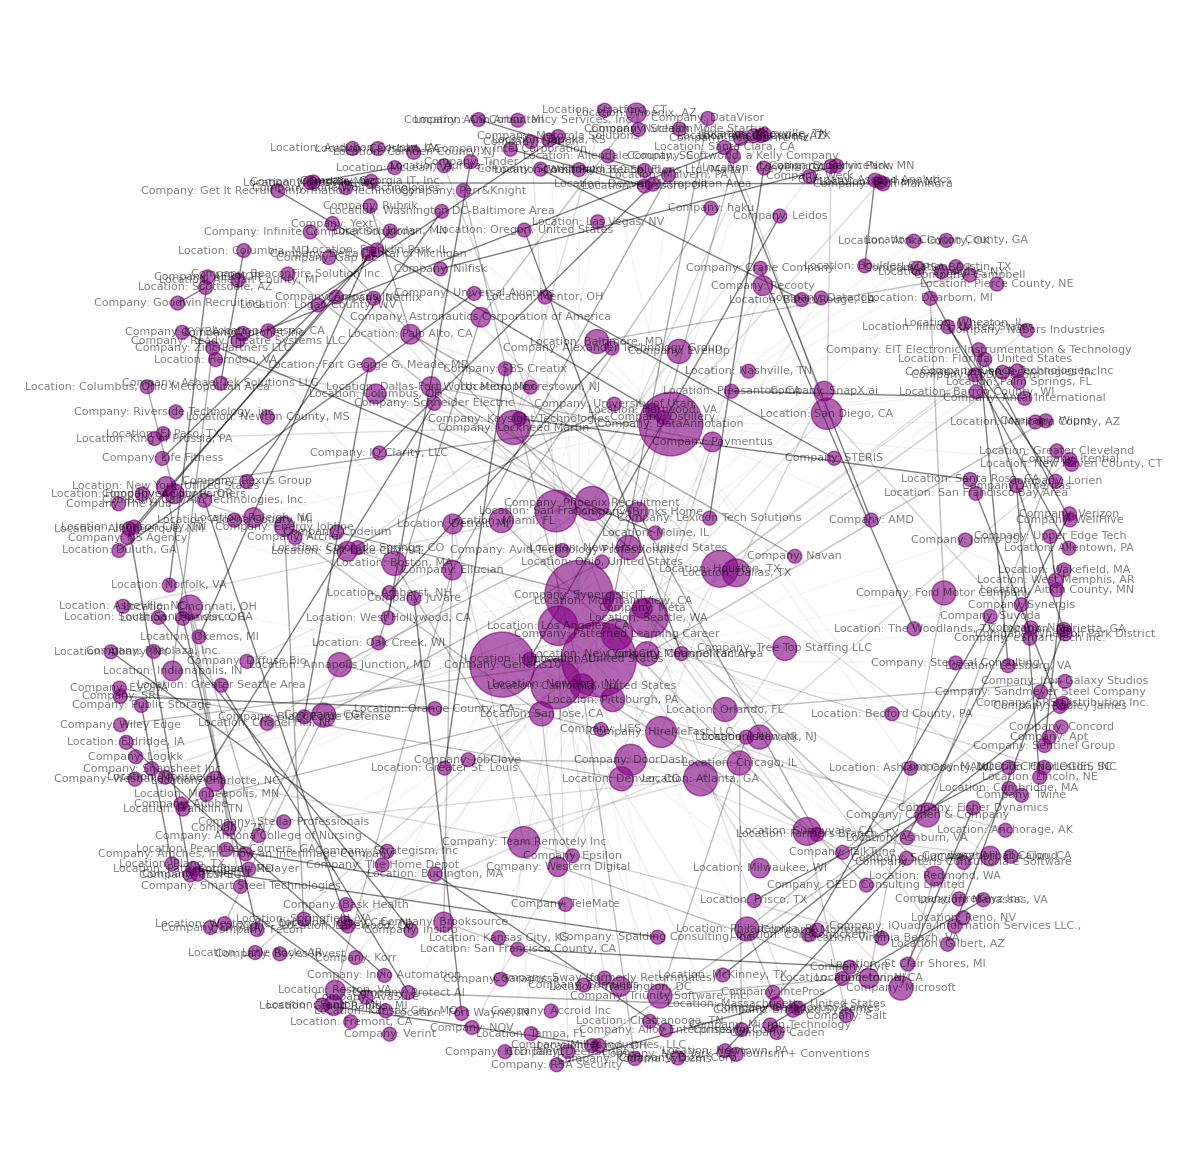

In [9]:
# Refining the Graph to get a better view

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for index, row in df.iterrows():
    company_node = f"Company: {row['Company']}"
    location_node = f"Location: {row['Location']}"
    # Nodes
    G.add_node(company_node, type='company')
    G.add_node(location_node, type='location')
    # Edges
    G.add_edge(company_node, location_node)
degrees = dict(G.degree())
node_sizes = [v * 100 for v in degrees.values()]
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.50, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='purple', alpha=0.6)
edges = G.edges()
edge_alpha = [(1 / (G.degree(e[0]) + G.degree(e[1]))) for e in edges]
nx.draw_networkx_edges(G, pos, edge_color='black', alpha=edge_alpha)

nx.draw_networkx_labels(G, pos, font_size=8, alpha=0.5)
plt.axis('off') 
plt.savefig('network_graph_refined.png', dpi=300)  
plt.show()


Modularity: 0.865818689404432


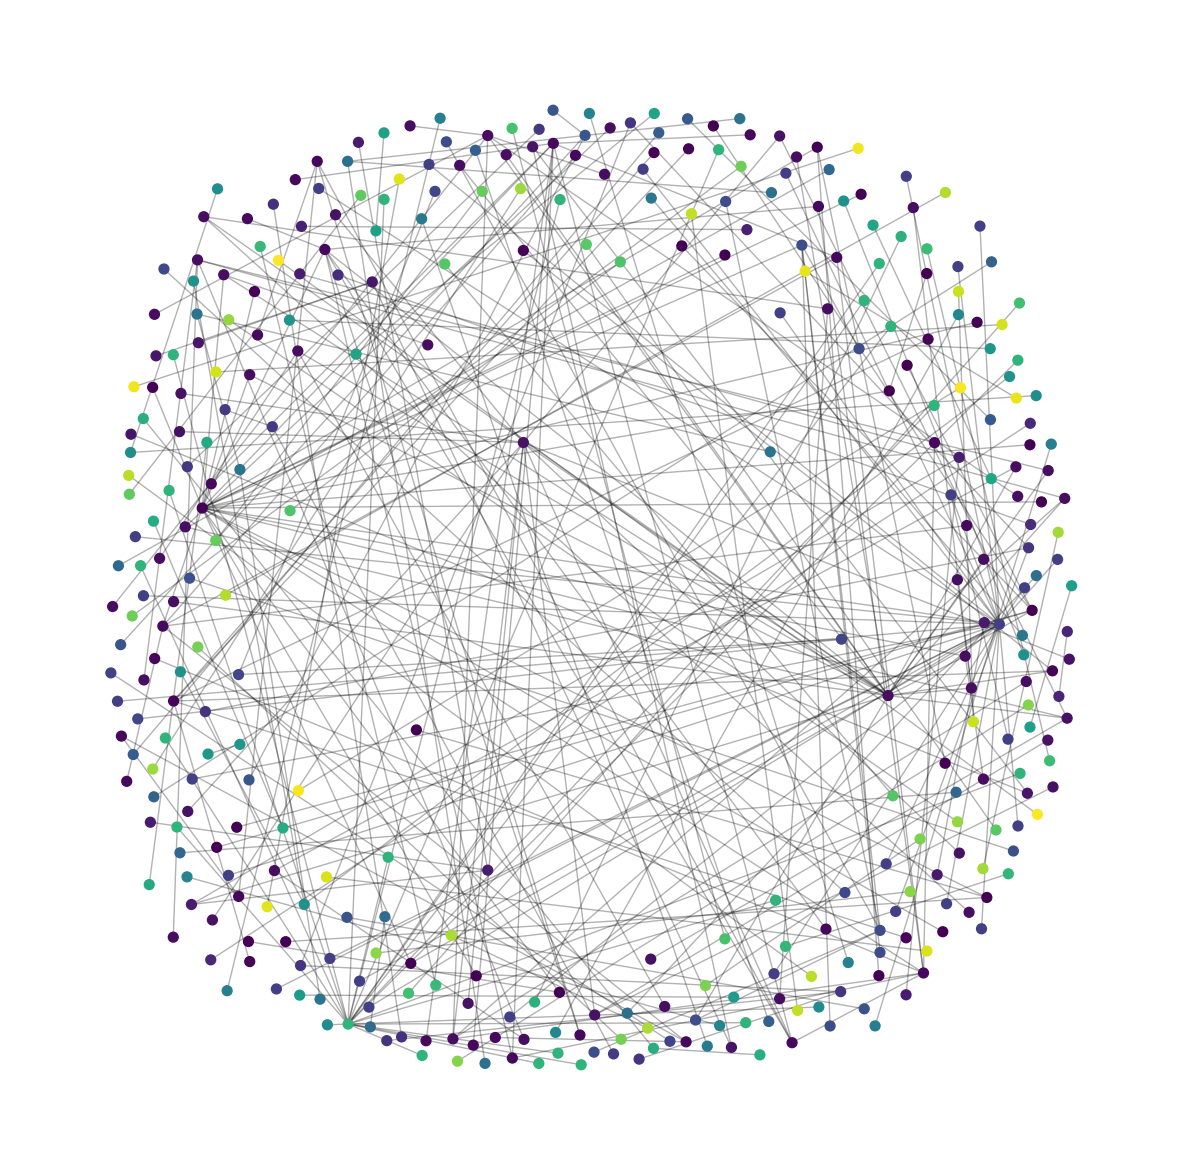

In [10]:
# Calculating the Modularity of the Affiliation Network Graph

import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt

partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)
print("Modularity:", modularity)
pos = nx.spring_layout(G, k=0.800, iterations=20)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)


plt.axis('off')
plt.show()


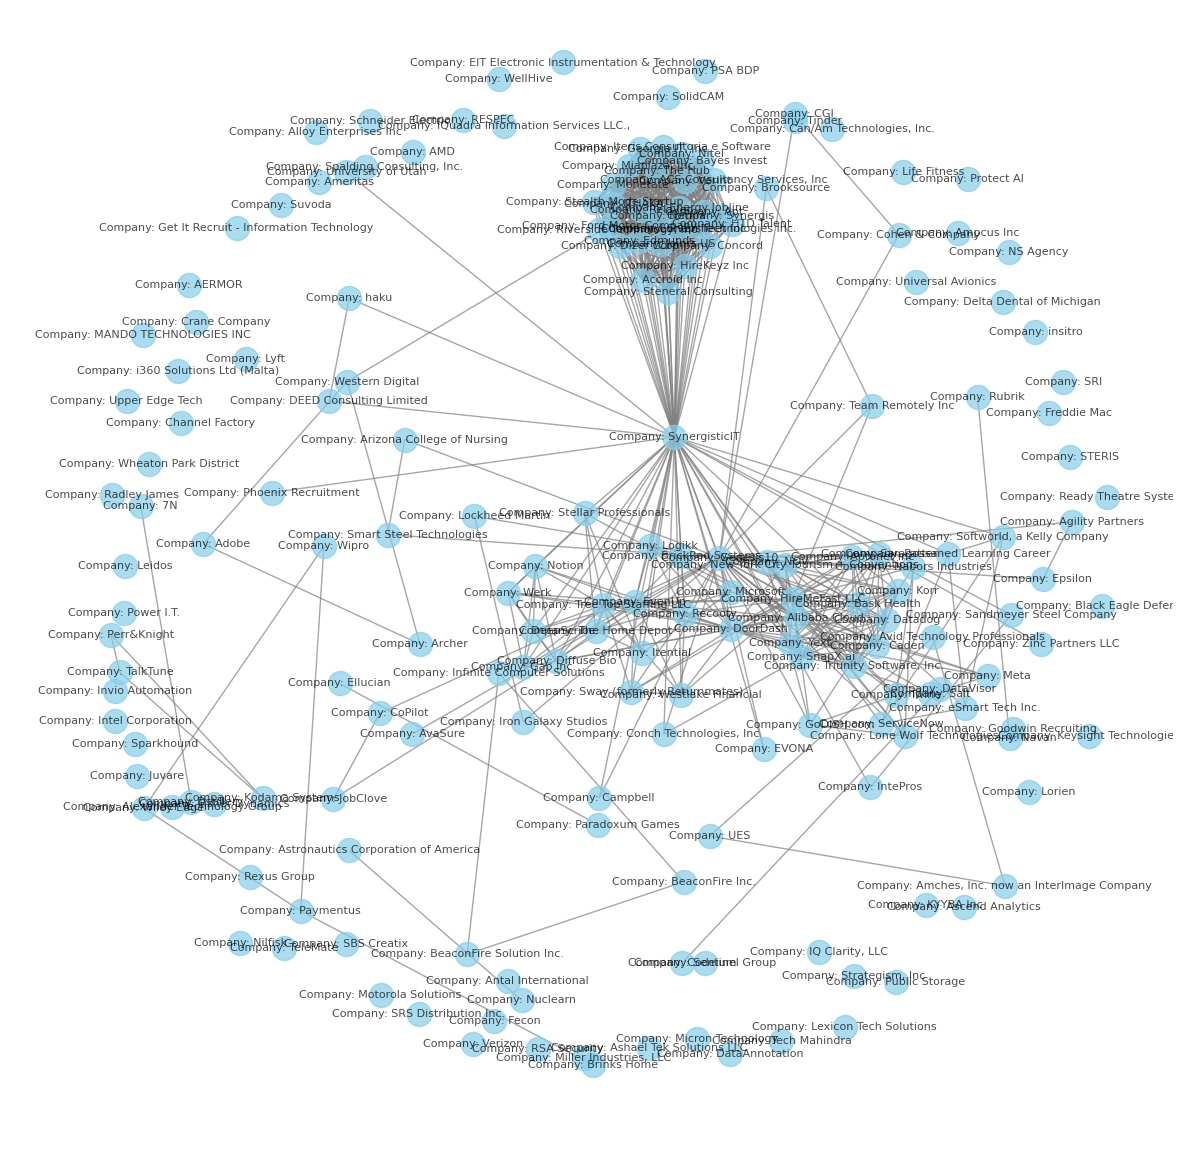

In [11]:
# Now we breakdown the bipartate graph to UNIMODEL network:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Initializing a bipartite graph
B = nx.Graph()
for index, row in df.iterrows():
    company_node = f"Company: {row['Company']}"
    location_node = f"Location: {row['Location']}"
    B.add_node(company_node, bipartite=0)  
    B.add_node(location_node, bipartite=1)  
    B.add_edge(company_node, location_node)

companies = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}

# 'G' is a unimodal network of companies connected by shared locations

G = nx.bipartite.projected_graph(B, companies)
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.50, iterations=50)  
nx.draw_networkx(G, pos, node_color='skyblue', edge_color='gray', with_labels=True, font_size=8, alpha=0.7)

plt.axis('off') 
plt.savefig('unimodal_network_graph.png', dpi=300)  
plt.show()


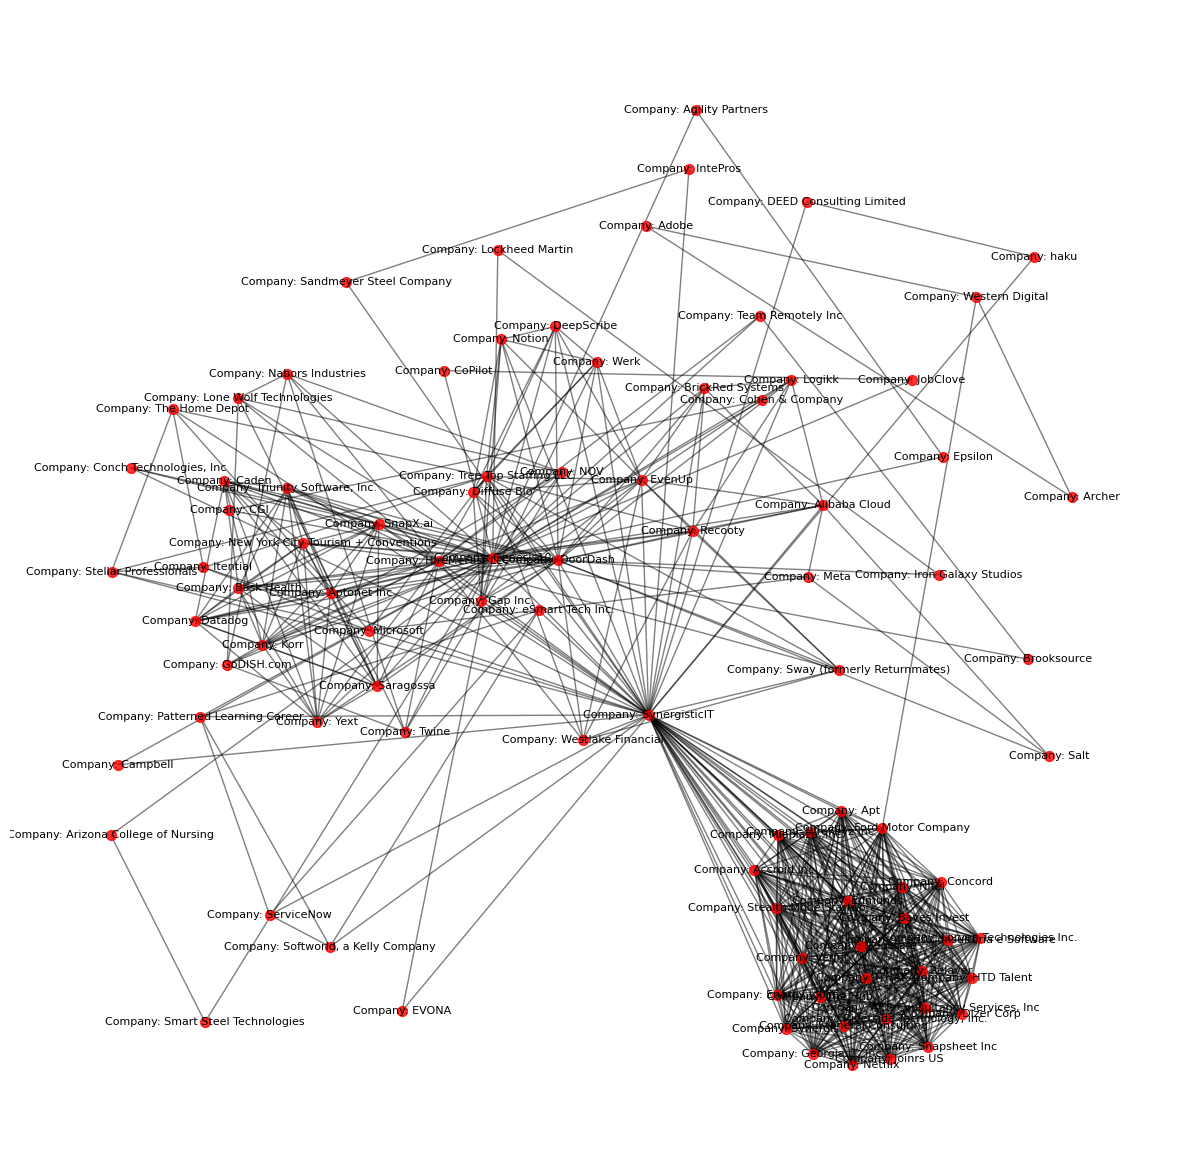

In [14]:
# Refining the Graph to get a better  analysis removing outliers:

largest_cc = max(nx.connected_components(G), key=len)
H = G.subgraph(largest_cc).copy()
threshold = 2 
nodes_to_remove = [node for node, degree in dict(H.degree()).items() if degree < threshold]
H.remove_nodes_from(nodes_to_remove)

pos = nx.spring_layout(H, k=0.75, iterations=50)  
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(H, pos, node_size=50, node_color='red', alpha=0.8)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=8)
plt.axis('off')
plt.show()




Modularity: 0.492508591978458


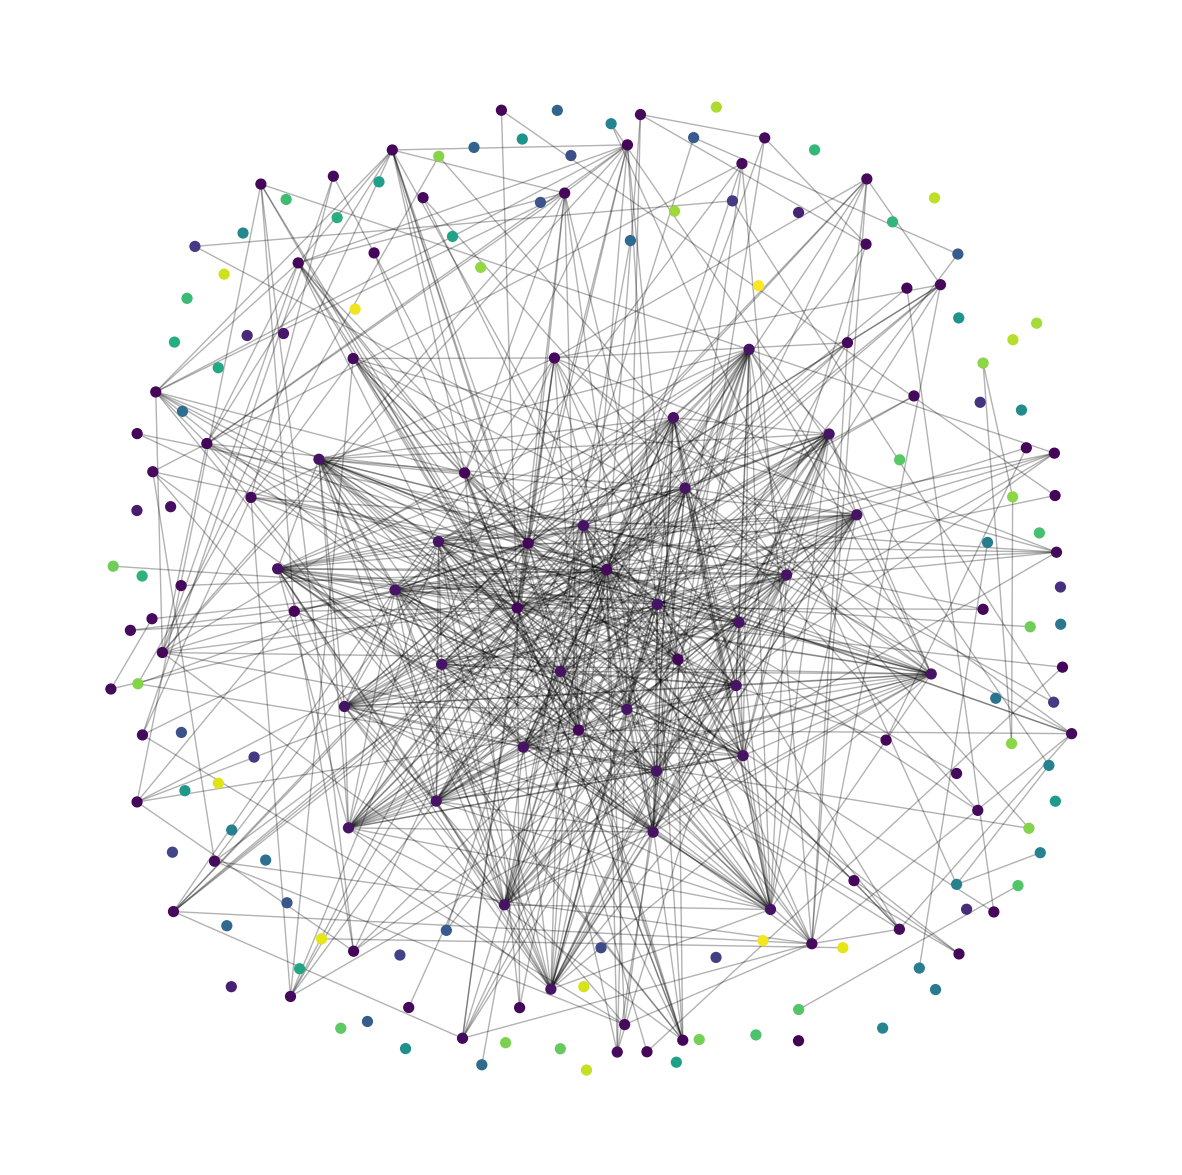

In [15]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
partition = community_louvain.best_partition(G)

modularity = community_louvain.modularity(partition, G)
print("Modularity:", modularity)

pos = nx.spring_layout(G, k=0.800, iterations=20)
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')
plt.show()

In [22]:
import pandas as pd
import networkx as nx

degrees = dict(G.degree())

# Clustering Coefficient
clustering_coeffs = nx.clustering(G)

# PageRank
pageranks = nx.pagerank(G)

# Closeness Centrality
closeness = nx.closeness_centrality(G)

# Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# Combine all the measures into a DataFrame for neat tabular presentation
df_measures = pd.DataFrame({
    "Node": list(G.nodes()),
    "Degree": [degrees[node] for node in G.nodes()],
    "Clustering Coefficient": [clustering_coeffs[node] for node in G.nodes()],
    "PageRank": [pageranks[node] for node in G.nodes()],
    "Closeness Centrality": [closeness[node] for node in G.nodes()],
    "Betweenness Centrality": [betweenness[node] for node in G.nodes()]
})

# Display the DataFrame
df_measures


Node  Degree  \
0    Company: EIT Electronic Instrumentation & Tech...       0   
1                                 Company: Brooksource       2   
2                       Company: Tree Top Staffing LLC      16   
3                                      Company: Leidos       0   
4                                   Company: Joinrs US      28   
..                                                 ...     ...   
183                                 Company: Dstillery       1   
184               Company: Sway (formerly Returnmates)       7   
185                           Company: Cohen & Company       2   
186                                  Company: Gap Inc.       8   
187               Company: Infinite Computer Solutions       2   

     Clustering Coefficient  PageRank  Closeness Centrality  \
0                  0.000000  0.001160              0.000000   
1                  1.000000  0.003157              0.194605   
2                  0.466667  0.012272              0.252681   
3                  0.000000  0.001160              0.000000   
4                  1.000000  0.009651              0.250062   
..                      ...       ...                   ...   
183                0.000000  0.007731              0.005348   
184                1.000000  0.005631              0.241310   
185                1.000000  0.003512              0.194605   
186                1.000000  0.006299              0.235425   
187                1.000000  0.007731              0.010695   

     Betweenness Centrality  
0                  0.000000  
1                  0.000000  
2                  0.002958  
3                  0.000000  
4                  0.000000  
..                      ...  
183                0.000000  
184                0.000000  
185                0.000000  
186                0.000000  
187                0.000000  

[188 rows x 6 columns]

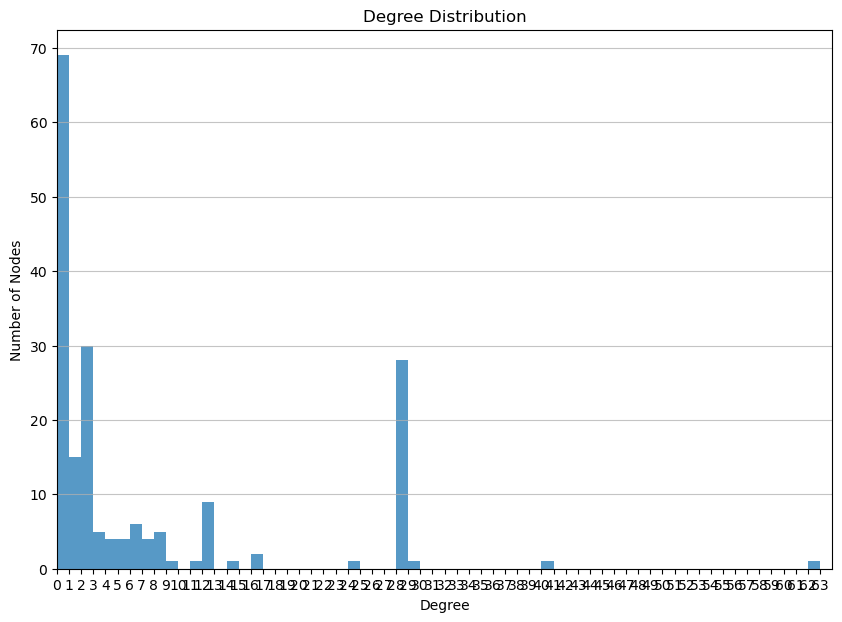

In [16]:
# Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # Sort the degrees
plt.figure(figsize=(10, 7))  # Increase the size of the plot
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 1, 1), alpha=0.75)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(range(min(degree_sequence), max(degree_sequence) + 1, 1))
plt.xlim([0, max(degree_sequence)+1])
plt.grid(axis='y', alpha=0.75)
plt.show()


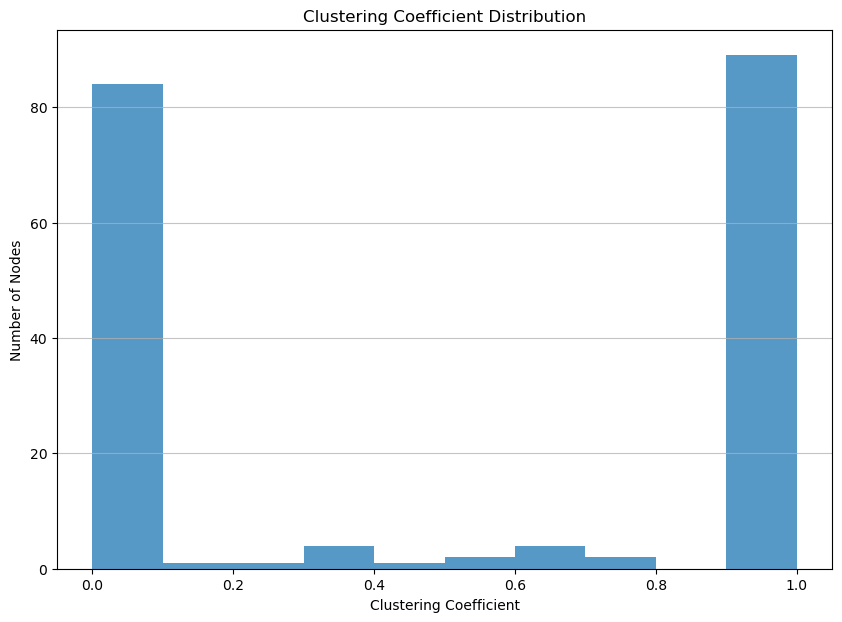

In [25]:
# Clustering Coefficient

clustering_values = list(clustering_coeffs.values())
plt.figure(figsize=(10, 7))
plt.hist(clustering_values, bins=10, alpha=0.75) 
plt.title("Clustering Coefficient Distribution")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.grid(axis='y', alpha=0.75)
plt.show()



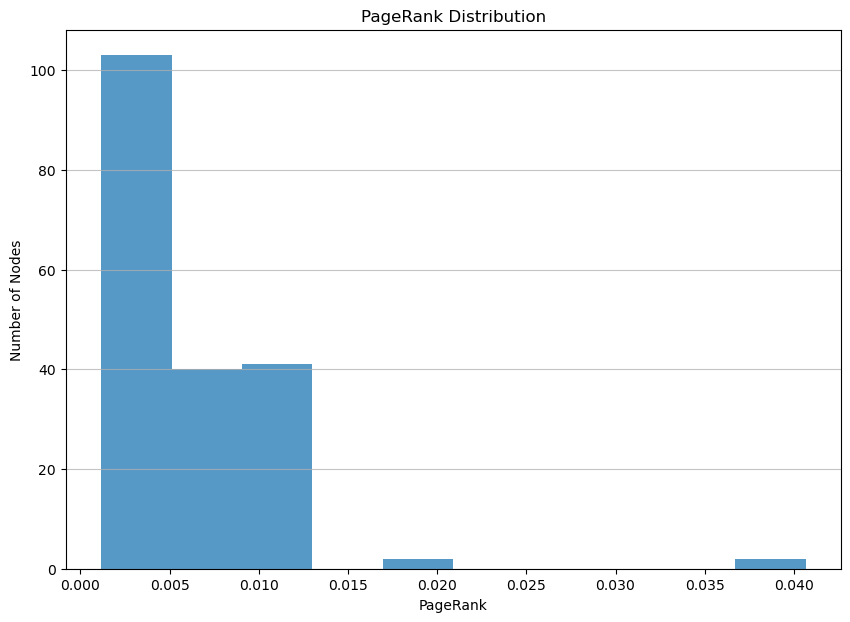

In [24]:
# PageRank


plt.figure(figsize=(10, 7))
plt.hist(pagerank_values, bins=10, alpha=0.75)  
plt.title("PageRank Distribution")
plt.xlabel("PageRank")
plt.ylabel("Number of Nodes")
plt.grid(axis='y', alpha=0.75)
plt.show()



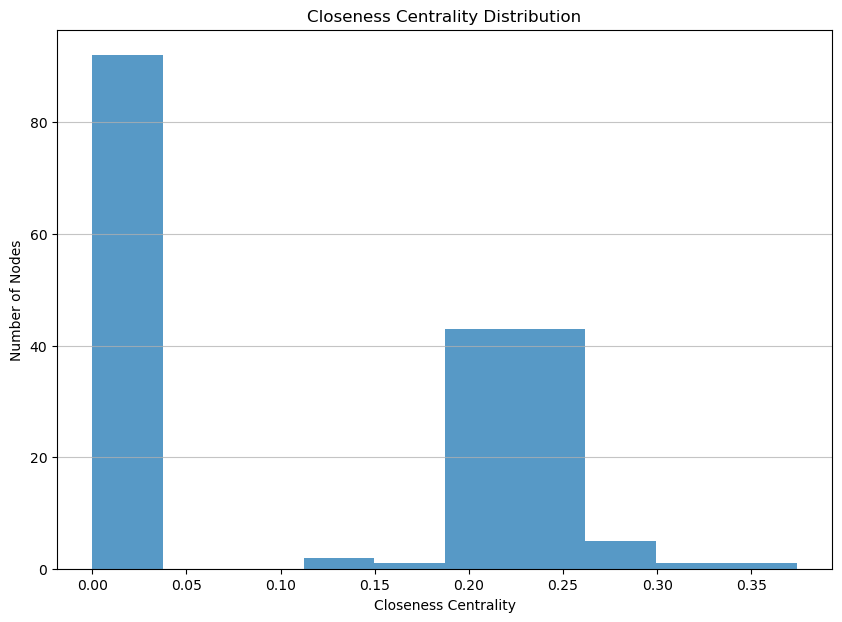

In [23]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Plotting the distribution of closeness centrality
plt.figure(figsize=(10, 7))
plt.hist(list(closeness_centrality.values()), bins=10, alpha=0.75)
plt.title("Closeness Centrality Distribution")
plt.xlabel("Closeness Centrality")
plt.ylabel("Number of Nodes")
plt.grid(axis='y', alpha=0.75)
plt.show()

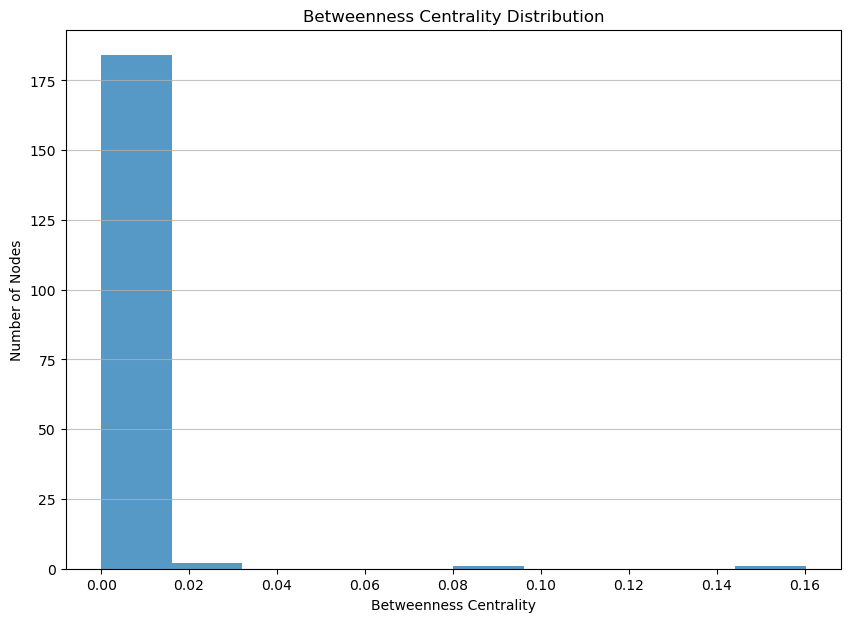

In [26]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Plotting the distribution of betweenness centrality
plt.figure(figsize=(10, 7))
plt.hist(list(betweenness_centrality.values()), bins=10, alpha=0.75)
plt.title("Betweenness Centrality Distribution")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Number of Nodes")
plt.grid(axis='y', alpha=0.75)
plt.show()
